<a href="https://colab.research.google.com/github/ahzam54/PYTHON/blob/master/Average_filtering_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Average filtering**
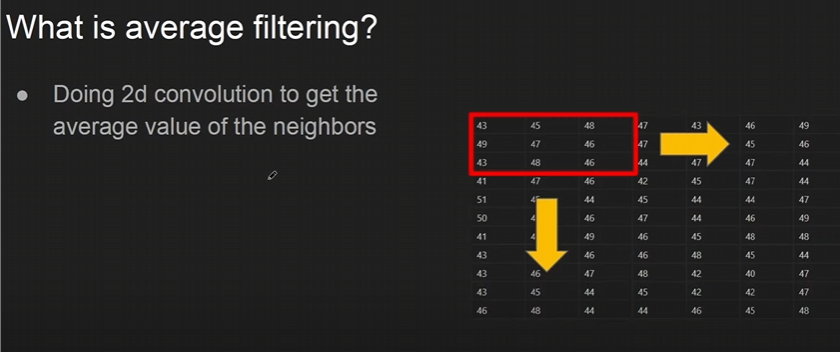

# **Why do we need average filtering**


*   smoothing/bluring images
*   noise reduction



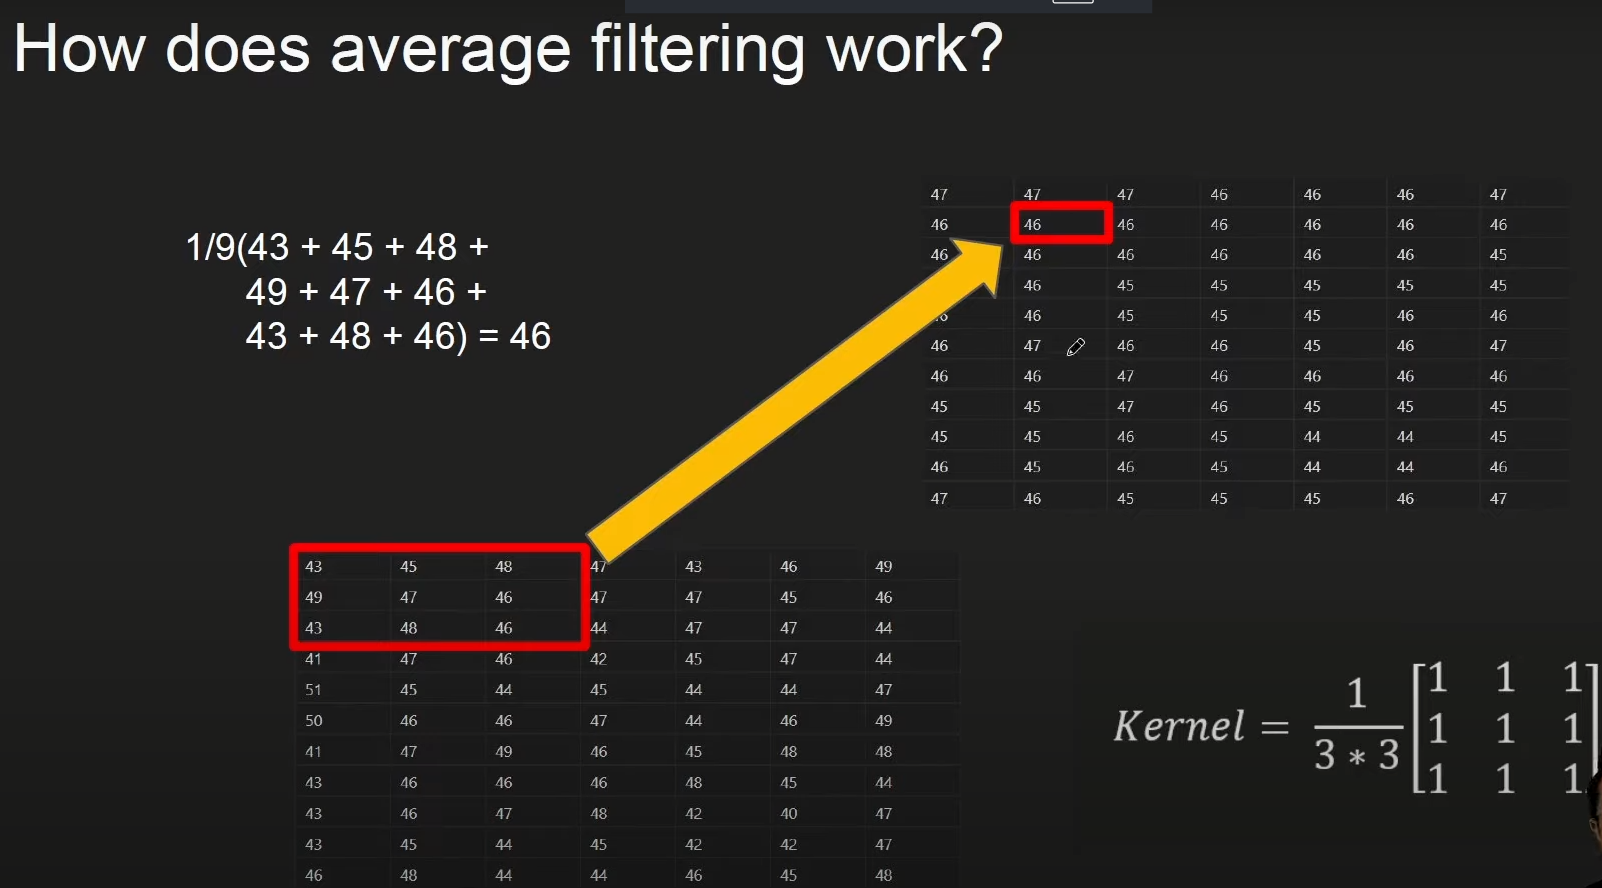

In [2]:
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def callback(input):
  pass

def averageFiltering():
    root = os.getcwd()
    imgpath = os.path.join(root,'cat.jpg')
    img = cv.imread(imgpath)

    winName = 'avg filter'
    cv.namedWindow(winName)
    cv.createTrackbar('n',winName,1,100,callback)

    height,width,_ = img.shape
    scale = 1/4
    width = int(width*scale)
    height = int(height*scale)
    img = cv.resize(img,(width,height))
    while True:
      if cv.waitKey(1) == ord('q'):
        break

        n = cv.getTrackbarPos('n',winName)
        imgFilter = cv.blur(img,(n,n))
        cv.imshow(winName,imgFilter)

      cv.destroyAllWindows()



In [ ]:
if __name__ == '__main__':
  averageFiltering()# this code will work in vscode but in colab gui in not working

# Task
Create an interactive image blur tool using matplotlib and ipywidgets. The tool should allow the user to upload an image, and then use a slider to control the kernel size of an average blur filter applied to the image. The blurred image should update dynamically as the slider is moved.

## Import necessary libraries

### Subtask:
Import the required libraries for image processing, interactive widgets, and displaying output.


**Reasoning**:
Import the necessary libraries for image processing, interactive widgets, and displaying output as requested in the instructions.



In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

## Upload and load image

### Subtask:
Provide code to upload an image and load it using OpenCV.


**Reasoning**:
Provide code to create an interactive image blur tool using matplotlib and ipywidgets, which allows the user to upload an image and use a slider to control the kernel size of an average blur filter applied to the image. The blurred image should update dynamically as the slider is moved. The current subtask is to provide code to upload an image and load it using OpenCV.



In [ ]:
output = widgets.Output()

def handle_upload(change):
    uploaded_file = change['new']
    if uploaded_file:
        # Get the first uploaded file, assuming only one file upload is allowed
        file_info = list(uploaded_file.values())[0]
        content = file_info['content']
        image_array = np.frombuffer(content, np.uint8)
        global original_image
        original_image = cv.imdecode(image_array, cv.IMREAD_COLOR)

        with output:
            if original_image is None:
                print("Error: Could not decode the image.")
            else:
                print("Image uploaded successfully!")


upload_widget = widgets.FileUpload(
    accept='.jpg, .jpeg, .png',
    multiple=False
)

upload_widget.observe(handle_upload, names='value')

display(upload_widget, output)

## Define filtering function

### Subtask:
Create a function that takes the image and kernel size as input, applies the average filter, and returns the filtered image.


**Reasoning**:
Define the function `apply_blur` to apply average filtering to an image using the specified kernel size and return the blurred image.



In [ ]:
def apply_blur(image, kernel_size):
    """Applies an average blur filter to an image.

    Args:
        image: The input image (NumPy array).
        kernel_size: The size of the kernel for blurring.

    Returns:
        The blurred image (NumPy array).
    """
    if image is None:
        return None
    # Ensure kernel_size is at least 1
    k_size = max(1, int(kernel_size))
    return cv.blur(image, (k_size, k_size))

## Create interactive plot

### Subtask:
Set up a matplotlib figure and axes to display the image.


**Reasoning**:
Set up the matplotlib figure and axes to display the image.



In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
if original_image is not None:
    img_display = ax.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
else:
    # Initialize with a blank image or handle later
    img_display = ax.imshow(np.zeros((100, 100, 3), dtype=np.uint8))

ax.axis('off')
plt.tight_layout()
plt.show()

**Reasoning**:
The error indicates that `original_image` is not defined when the cell is executed. This is because the image upload happens asynchronously via the widget. Initialize `original_image` to `None` before creating the figure and axes to avoid this error.



In [ ]:
original_image = None # Initialize original_image

fig, ax = plt.subplots(figsize=(10, 10))
if original_image is not None:
    img_display = ax.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
else:
    # Initialize with a blank image or handle later
    img_display = ax.imshow(np.zeros((100, 100, 3), dtype=np.uint8))

ax.axis('off')
plt.tight_layout()
plt.show()

## Create slider widget

### Subtask:
Generate an `ipywidgets.IntSlider` to control the blur kernel size.


**Reasoning**:
Generate an ipywidgets.IntSlider to control the blur kernel size as per the instructions.



In [ ]:
blur_slider = widgets.IntSlider(
    description='Kernel Size',
    min=1,
    max=30,
    value=1,
)
display(blur_slider)

## Connect widget to function

### Subtask:
Define a function that will be called when the slider value changes. This function will apply the filter with the new kernel size and update the displayed image.


**Reasoning**:
Define the `update_blur` function to handle slider changes and connect it to the slider using `interactive_output`.



In [ ]:
def update_blur(kernel_size):
    """Updates the displayed image with the blurred version."""
    global original_image, img_display, fig

    if original_image is not None:
        blurred_image = apply_blur(original_image, kernel_size)
        if blurred_image is not None:
            # Convert BGR to RGB for displaying with matplotlib
            img_display.set_data(cv.cvtColor(blurred_image, cv.COLOR_BGR2RGB))
            fig.canvas.draw_idle()
    else:
        print("Please upload an image first.")

interactive_plot = widgets.interactive_output(
    update_blur,
    {'kernel_size': blur_slider}
)

display(interactive_plot)

## Summary:

### Data Analysis Key Findings

*   The solution successfully utilizes `ipywidgets` to create an interactive image blur tool within a Jupyter environment.
*   The tool allows users to upload an image file (JPG, JPEG, PNG) via a `FileUpload` widget.
*   OpenCV (`cv2`) is used for reading the uploaded image content and applying the average blur filter.
*   Matplotlib (`matplotlib.pyplot`) provides the figure and axes for displaying the original or blurred image.
*   An `IntSlider` widget controls the kernel size of the average blur filter, with a range from 1 to 30.
*   The `ipywidgets.interactive_output` function is used to dynamically link the slider's value to a function that updates the displayed image with the applied blur.
*   The application includes basic error handling to check for successful image decoding and prompts the user to upload an image if none is present before attempting to blur.

### Insights or Next Steps

*   Add a display of the original image alongside the blurred image for easier comparison.
*   Implement support for different types of blur filters (e.g., Gaussian blur) and allow the user to select the filter type.
